# Exploratory Data Analysis on the Citibike Data
Analyze the (pre-processed) Citibike Data and examine basic ridership pattern. Following things were explored here
- Seasonal Patterns
- Trip Durations
- Age Distribution of the riders
- Gender Distribution
- Subscribers vs non-subscribers
- Hourly Ridership Pattern

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
%matplotlib inline

In [2]:
# Method for printing the result of a normality test
def normal_or_not(normality_test_result, siglevel=0.01):
    if normality_test_result.pvalue >= siglevel:
        return 'Yes'
    else:
        return 'No'

In [3]:
# Method for printing the result of a significance test
def significantly_different_or_not(test_result, siglevel=0.01):
    if test_result.pvalue >= siglevel:
        return 'No'
    else:
        return 'Yes'

In [4]:
# Import two sets of data separately
d1 = pd.read_csv('./data/processed/extended2/p_s_alltime.csv')
d2 = pd.read_csv('./data/processed/extended2/p_ns_alltime.csv')

In [5]:
# Combined the imported data and drop a column
daily = pd.concat([d1, d2], axis=0)
del daily['Unnamed: 0']

In [6]:
# Create datetime-related columns
daily['datetime'] = pd.to_datetime(daily['date'], format='%Y%m%d')
daily['year'] = daily.datetime.dt.year
daily['month'] = daily.datetime.dt.month
daily['day'] = daily.datetime.dt.day
daily['dayofweek'] = daily.datetime.dt.dayofweek

<b>Seasonal Patterns</b>

In [7]:
# Group the data by year and month
daily.groupby(['year', 'month']).count()

date  pickups  st_id  datetime    day  dayofweek
year month                                                   
2013 7      19828    19828  19828     19828  19828      19828
     8      19303    19303  19303     19303  19303      19303
     9      18817    18817  18817     18817  18817      18817
     10     18915    18915  18915     18915  18915      18915
     11     17033    17033  17033     17033  17033      17033
     12     15490    15490  15490     15490  15490      15490
2014 1      12848    12848  12848     12848  12848      12848
     2      11095    11095  11095     11095  11095      11095
     3      15687    15687  15687     15687  15687      15687
     4      16955    16955  16955     16955  16955      16955
     5      18842    18842  18842     18842  18842      18842
     6      18591    18591  18591     18591  18591      18591
     7      19224    19224  19224     19224  19224      19224
     8      19303    19303  19303     19303  19303      19303
     9      18531    18531  18531     18531  18531      18531
     10     18473    18473  18473     18473  18473      18473
     11     15984    15984  15984     15984  15984      15984
     12     15070    15070  15070     15070  15070      15070
2015 1      12609    12609  12609     12609  12609      12609
     2      10378    10378  10378     10378  10378      10378
     3      14314    14314  14314     14314  14314      14314
     4      17483    17483  17483     17483  17483      17483
     5      19380    19380  19380     19380  19380      19380
     6      18651    18651  18651     18651  18651      18651
     7      19780    19780  19780     19780  19780      19780
     8      21929    21929  21929     21929  21929      21929
     9      25049    25049  25049     25049  25049      25049
     10     26054    26054  26054     26054  26054      26054
     11     25110    25110  25110     25110  25110      25110
     12     24694    24694  24694     24694  24694      24694
2016 1      18597    18597  18597     18597  18597      18597
     2      20092    20092  20092     20092  20092      20092
     3      25693    25693  25693     25693  25693      25693
     4      25414    25414  25414     25414  25414      25414
     5      26887    26887  26887     26887  26887      26887
     6      26118    26118  26118     26118  26118      26118
     7      27732    27732  27732     27732  27732      27732
     8      30325    30325  30325     30325  30325      30325
     9      32457    32457  32457     32457  32457      32457
     10     32936    32936  32936     32936  32936      32936
     11     29166    29166  29166     29166  29166      29166
     12     26590    26590  26590     26590  26590      26590
2017 1      25048    25048  25048     25048  25048      25048
     2      23137    23137  23137     23137  23137      23137
     3      22747    22747  22747     22747  22747      22747

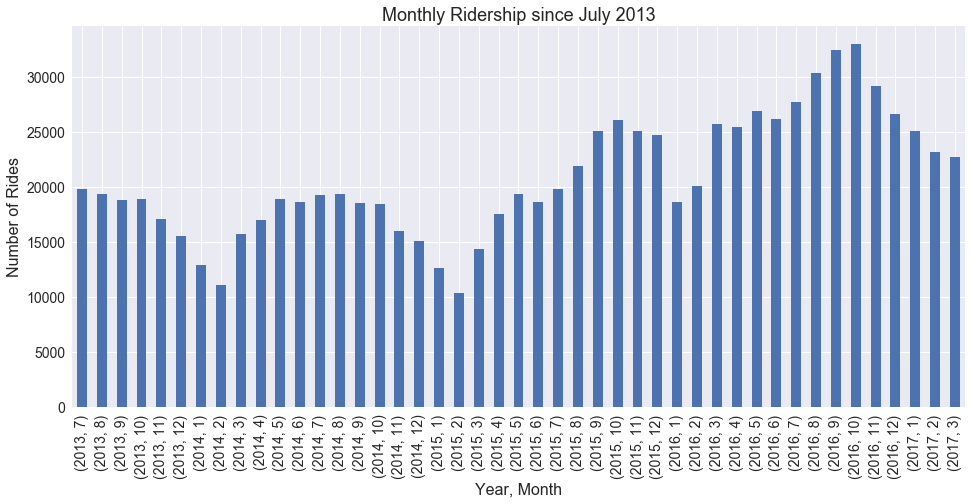

In [8]:
# Plot the monthly usage since the inception
usage_by_month = daily.groupby(['year', 'month']).count()
plt.figure(figsize=(16, 7))
ax = usage_by_month['pickups'].plot(kind='bar')
ax.set_xlabel('Year, Month', fontsize=16)
ax.set_ylabel('Number of Rides', fontsize=16)
ax.set_title('Monthly Ridership since July 2013', fontsize=18)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

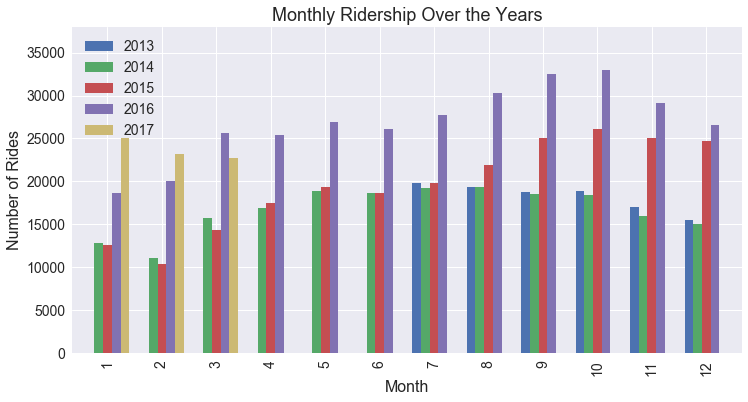

In [9]:
# Same plot as above but with a different grouping of bars
usage_by_month2 = daily.groupby(['year', 'month']).count()['pickups'].unstack('year')

sns.set_style("darkgrid")
ax2 = usage_by_month2.plot(kind='bar', figsize=(12,6), width=0.8)# colormap='Set3')
ax2.legend(loc='upper left', fontsize=14)
ax2.set_xlabel('Month', fontsize=16)
ax2.set_ylabel('Number of Rides', fontsize=16)
ax2.set_title('Monthly Ridership Over the Years', fontsize=18)
ax2.set_ylim([0, 38000])
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

<b>Overall Trip Durations</b>

In [10]:
# Read in another set of data for trip duration analysis
d2013 = pd.read_csv('./data/for_predictions/2013_membership_pred.csv')
d2013 = d2013[['tripduration', 'birth year', 'gender', 'usertype', 'start_year', 'start_month', 'start_day', 'start_dayofweek', 'start_hour']]

d2014 = pd.read_csv('./data/for_predictions/2014_membership_pred.csv')
d2014 = d2014[['tripduration', 'birth year', 'gender', 'usertype', 'start_year', 'start_month', 'start_day', 'start_dayofweek', 'start_hour']]

d2015 = pd.read_csv('./data/for_predictions/2015_membership_pred.csv')
d2015 = d2015[['tripduration', 'birth year', 'gender', 'usertype', 'start_year', 'start_month', 'start_day', 'start_dayofweek', 'start_hour']]

d2016 = pd.read_csv('./data/for_predictions/2016_membership_pred.csv')
d2016 = d2016[['tripduration', 'birth year', 'gender', 'usertype', 'start_year', 'start_month', 'start_day', 'start_dayofweek', 'start_hour']]

d2017 = pd.read_csv('./data/for_predictions/2017_membership_pred.csv')
d2017 = d2017[['tripduration', 'birth year', 'gender', 'usertype', 'start_year', 'start_month', 'start_day', 'start_dayofweek', 'start_hour']]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
# Combine data
data = pd.concat([d2013, d2014, d2015, d2016, d2017], axis=0)

In [12]:
# Convert Trip duration to minutes
data['tripduration'] /= 60

In [13]:
data.head()

,tripduration,birth year,gender,usertype,start_year,start_month,start_day,start_dayofweek,start_hour
0,10.566667,\N,0,Customer,2013,7,1,0,0
1,25.783333,\N,0,Customer,2013,7,1,0,0
2,2.966667,1980,2,Subscriber,2013,7,1,0,0
3,26.333333,\N,0,Customer,2013,7,1,0,0
4,12.616667,1986,1,Subscriber,2013,7,1,0,0


In [14]:
data.describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99, 0.999, 0.9999]).astype(int)

,tripduration,gender,start_year,start_month,start_day,start_dayofweek,start_hour
count,35873893,35873893,35873893,35873893,35873893,35873893,35873893
mean,13,1,2014,7,15,2,13
std,100,0,1,3,8,1,4
min,1,0,2013,1,1,0,0
25%,6,1,2014,5,8,1,10
50%,9,1,2015,8,16,3,15
75%,16,1,2016,10,23,4,18
95%,30,2,2017,12,29,6,21
99%,46,2,2017,12,31,6,23
99.9%,238,2,2017,12,31,6,23


CPU times: user 6min 39s, sys: 6.04 s, total: 6min 45s
Wall time: 6min 45s


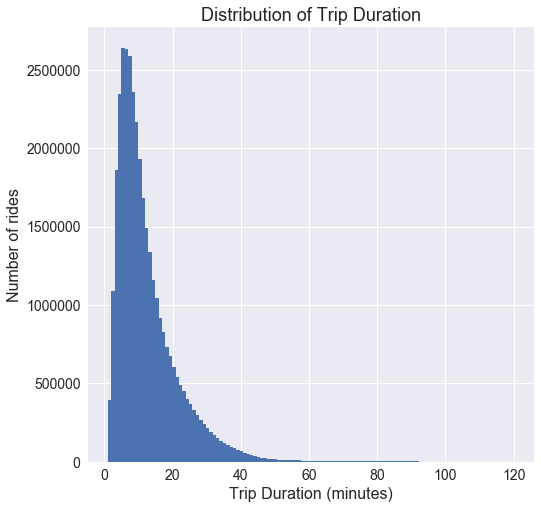

In [15]:
%%time
# Plot frequency distribution of trip duration
# Based on the above, remove any entry with duration more than 2hours. This would easily cover 99% of the rides
duration = data[data.tripduration <= 2* 60]['tripduration']
ax3 = duration.plot(kind='hist', bins=120, figsize=(8,8))
ax3.set_title('Distribution of Trip Duration', fontsize=18)
ax3.set_xlabel('Trip Duration (minutes)', fontsize=16)
ax3.set_ylabel('Number of rides', fontsize=16)
for tick in ax3.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax3.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

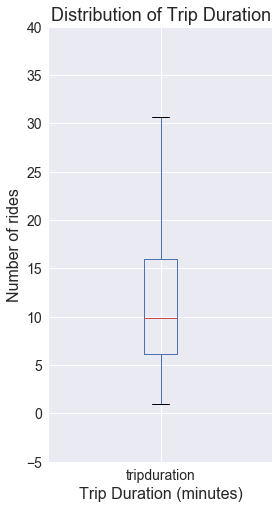

In [16]:
# Boxplot the same thing
ax3_1 = duration.plot(kind='box', figsize=(4,8))
ax3_1.set_title('Distribution of Trip Duration', fontsize=18)
ax3_1.set_xlabel('Trip Duration (minutes)', fontsize=16)
ax3_1.set_ylabel('Number of rides', fontsize=16)
ax3_1.set_ylim([-5, 40])
for tick in ax3_1.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax3_1.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

In [17]:
# Normality test here
duration_normaltest_ressult = scs.normaltest(duration)

print('----- Test for normality for trip duration distribution -----')
print('Is the trip duration normally distributed?: %s (p-value=%f)'\
      % (normal_or_not(duration_normaltest_ressult), duration_normaltest_ressult.pvalue))

----- Test for normality for trip duration distribution -----
Is the trip duration normally distributed?: No (p-value=0.000000)


<b>Age Distributions</b>

In [18]:
# Drop entries with invalid 'birth year' field
age = data[data['birth year'] != '\\N']

In [19]:
# Calculate the age of the rider
age['birth year'] = age['birth year'].astype(float).astype(int)
age['start_year'] = age['start_year'].astype(int)
age['age'] = age['start_year'] - age['birth year']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [20]:
age.head()

,tripduration,birth year,gender,usertype,start_year,start_month,start_day,start_dayofweek,start_hour,age
2,2.966667,1980,2,Subscriber,2013,7,1,0,0,33
4,12.616667,1986,1,Subscriber,2013,7,1,0,0,27
5,14.350000,1988,1,Subscriber,2013,7,1,0,0,25
7,4.800000,1985,2,Subscriber,2013,7,1,0,0,28
8,12.766667,1980,2,Subscriber,2013,7,1,0,0,33


In [21]:
age['birth year'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99, 0.999, 0.9999]).astype(int)

count     34626249
mean          1976
std             11
min           1885
25%           1969
50%           1979
75%           1986
95%           1992
99%           1995
99.9%         1999
99.99%        2000
max           2001
Name: birth year, dtype: int64

In [22]:
age['age'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99, 0.999, 0.9999]).astype(int)

count     34626249
mean            38
std             11
min             16
25%             29
50%             36
75%             46
95%             59
99%             67
99.9%           77
99.99%         116
max            132
Name: age, dtype: int64

In [23]:
# Check how many rider were made by people above "100" years old
print('# Rides by people above 100 years old %d ???!!!!' % len(age[age.age > 100]))

# Rides by people above 100 years old 13496 ???!!!!


CPU times: user 6min 36s, sys: 9.53 s, total: 6min 45s
Wall time: 6min 46s


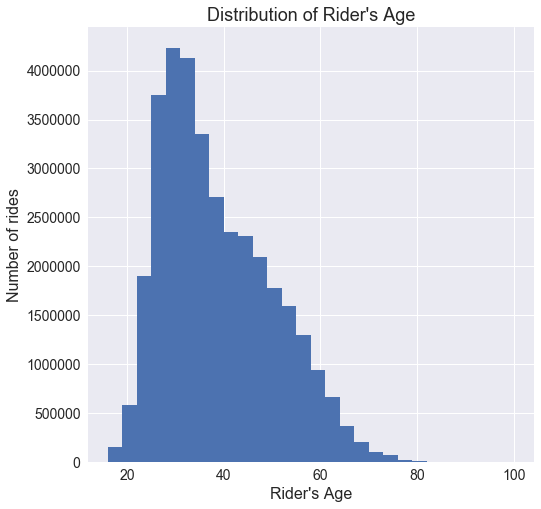

In [24]:
%%time
# Plot age distribution of riders. Only include ones whose age is less than or equal to 100
# Based on the above, remove any entry with duration more than 4hours. This would cover 99.9% of the rides
age_distribution = age[age.age <= 100]['age']
ax4 = age_distribution.plot(kind='hist', bins=28, figsize=(8,8))
ax4.set_title('Distribution of Rider\'s Age', fontsize=18)
ax4.set_xlabel('Rider\'s Age', fontsize=16)
ax4.set_ylabel('Number of rides', fontsize=16)
for tick in ax4.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax4.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

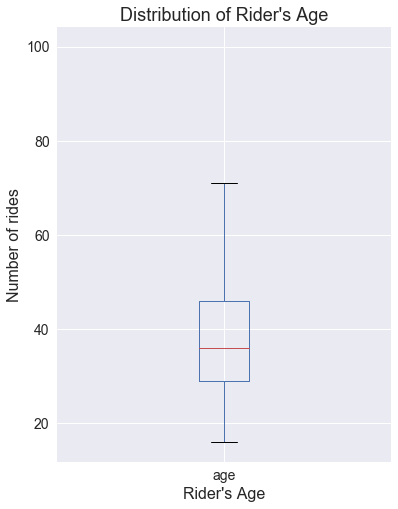

In [25]:
# Same thing plotted in boxplot
ax4_1 = age_distribution.plot(kind='box', figsize=(6,8))
ax4_1.set_title('Distribution of Rider\'s Age', fontsize=18)
ax4_1.set_xlabel('Rider\'s Age', fontsize=16)
ax4_1.set_ylabel('Number of rides', fontsize=16)
for tick in ax4_1.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax4_1.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

In [26]:
# Normality test here
age_normaltest_ressult = scs.normaltest(age_distribution)

print('----- Test for normality for age distribution -----')
print('Is the rider age normally distributed?: %s (p-value=%f)'\
      % (normal_or_not(age_normaltest_ressult), age_normaltest_ressult.pvalue))

----- Test for normality for age distribution -----
Is the rider age normally distributed?: No (p-value=0.000000)


<b>Gender Distribution</b>

In [27]:
# Check the gender size
print('0: Unknown, 1: Male, 2: Female')
data.groupby('gender').size()

0: Unknown, 1: Male, 2: Female


gender
0     1302575
1    26433121
2     8138197
dtype: int64

In [28]:
# Convert into percentage
total_rider = len(data)
unknowns, num_males, num_females = data.groupby('gender').size()
print('Male: %.1f%%' % (100 * num_males / total_rider))
print('Female: %.1f%%' % (100 * num_females / total_rider))
print('Gender Unknown: %.1f%%' % (100 * unknowns / total_rider))

Male: 73.7%
Female: 22.7%
Gender Unknown: 3.6%


In [29]:
# Create separate datasets for males and females
males = data[data.gender == 1]
females = data[data.gender == 2]

In [30]:
# Get trip durations
m_dur = males[males.tripduration <= 120]['tripduration']
f_dur = females[females.tripduration <= 120]['tripduration']

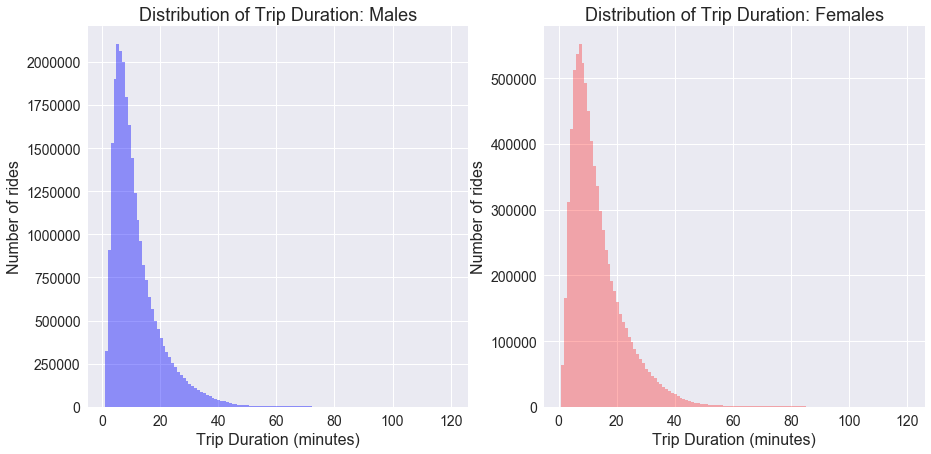

In [31]:
# Plot trip duration distribution for males and females
fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(15, 7), sharey=False, sharex=True)
ax5.hist(m_dur, bins=120, color='b', alpha=0.4)
ax5.set_title('Distribution of Trip Duration: Males', fontsize=18)
ax5.set_xlabel('Trip Duration (minutes)', fontsize=16)
ax5.set_ylabel('Number of rides', fontsize=16)
for tick in ax5.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax5.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    
ax6.hist(f_dur, bins=120, color='r', alpha=0.3)
ax6.set_title('Distribution of Trip Duration: Females', fontsize=18)
ax6.set_xlabel('Trip Duration (minutes)', fontsize=16)
ax6.set_ylabel('Number of rides', fontsize=16)
for tick in ax6.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax6.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

(0, 60)

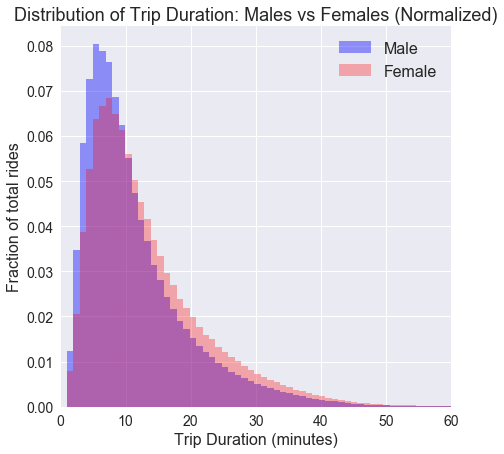

In [32]:
# This time, plot them on the same graph after normalization
plt.figure(figsize=(7, 7))
plt.hist(m_dur, bins=120, normed=True, label='Male', color='b', alpha=0.4)
plt.hist(f_dur, bins=120, normed=True, label='Female', color='r', alpha=0.3)
plt.title('Distribution of Trip Duration: Males vs Females (Normalized)', fontsize=18)
plt.xlabel('Trip Duration (minutes)', fontsize=16)
plt.ylabel('Fraction of total rides', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=16)
plt.xlim([0, 60])

(-5, 40)

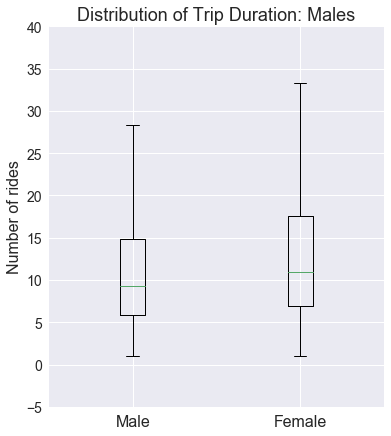

In [62]:
# Plot the above with boxplot
plt.figure(figsize=(6, 7))

m_f = [m_dur, f_dur]
plt.boxplot(m_f)
plt.title('Distribution of Trip Duration: Males & Females', fontsize=18)
#plt.xlabel('Trip Duration (minutes)', fontsize=16)
plt.ylabel('Number of rides', fontsize=16)
plt.xticks([1, 2], ['Male', 'Female'], fontsize=16)
plt.yticks(fontsize=14)
plt.ylim([-5, 40])

In [34]:
m_dur.describe().astype(int)

count    26392521
mean           11
std             8
min             1
25%             5
50%             9
75%            14
max           120
Name: tripduration, dtype: int64

In [35]:
f_dur.describe().astype(int)

count    8119883
mean          13
std            9
min            1
25%            6
50%           10
75%           17
max          120
Name: tripduration, dtype: int64

In [36]:
# Normality Test & Test for significant difference
male_normaltest_ressult = scs.normaltest(m_dur)
female_normaltest_ressult = scs.normaltest(f_dur)

gender_MWtest_result = scs.mannwhitneyu(m_dur, f_dur)
gender_Ttest_result = scs.ttest_ind(m_dur, f_dur)

print('----- Test for normality and test for differences between subs and non-subs -----')
print('Is male trip duration normally distributed?: %s (p-value=%f)'\
      % (normal_or_not(male_normaltest_ressult), male_normaltest_ressult.pvalue))
print('Is female trip duration normally distributed?: %s (p-value=%f)'\
      % (normal_or_not(female_normaltest_ressult), female_normaltest_ressult.pvalue))
print('----- Are male and femal trip duration pattern different? -----')
print('Mann-Whitney U test: %s (p-value=%f)'\
                  % (significantly_different_or_not(gender_MWtest_result), gender_MWtest_result.pvalue))
print('T test: %s (p-value=%f)'\
                  % (significantly_different_or_not(gender_Ttest_result), gender_Ttest_result.pvalue))

----- Test for normality and test for differences between subs and non-subs -----
Is male trip duration normally distributed?: No (p-value=0.000000)
Is female trip duration normally distributed?: No (p-value=0.000000)
----- Are male and femal trip duration pattern different? -----
Mann-Whitney U test: Yes (p-value=0.000000)
T test: Yes (p-value=0.000000)


<b>Subscribers vs non-subscribers</b>

In [37]:
data.columns

Index(['tripduration', 'birth year', 'gender', 'usertype', 'start_year',
       'start_month', 'start_day', 'start_dayofweek', 'start_hour'],
      dtype='object')

In [38]:
# Get subscriber and non-subscriber data
daily_subs = data[data['usertype'] == 'Subscriber']
daily_nonsubs = data[data['usertype'] == 'Customer']

In [39]:
# Trip durations data
daily_subs_dur = daily_subs[daily_subs.tripduration <=120]['tripduration']
daily_nonsubs_dur = daily_nonsubs[daily_nonsubs.tripduration <=120]['tripduration']

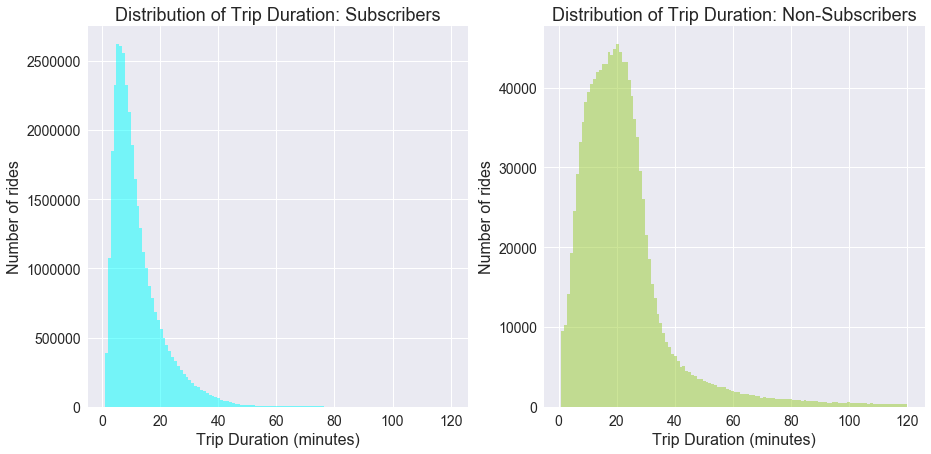

In [40]:
# Histograms for Tripdurations
fig, (ax7, ax8) = plt.subplots(1, 2, figsize=(15, 7), sharey=False, sharex=True)
ax7.hist(daily_subs_dur, bins=120, color='aqua', alpha=0.5)
ax7.set_title('Distribution of Trip Duration: Subscribers', fontsize=18)
ax7.set_xlabel('Trip Duration (minutes)', fontsize=16)
ax7.set_ylabel('Number of rides', fontsize=16)
for tick in ax7.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax7.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    
ax8.hist(daily_nonsubs_dur, bins=120, color='yellowgreen', alpha=0.5)
ax8.set_title('Distribution of Trip Duration: Non-Subscribers', fontsize=18)
ax8.set_xlabel('Trip Duration (minutes)', fontsize=16)
ax8.set_ylabel('Number of rides', fontsize=16)
for tick in ax8.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax8.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

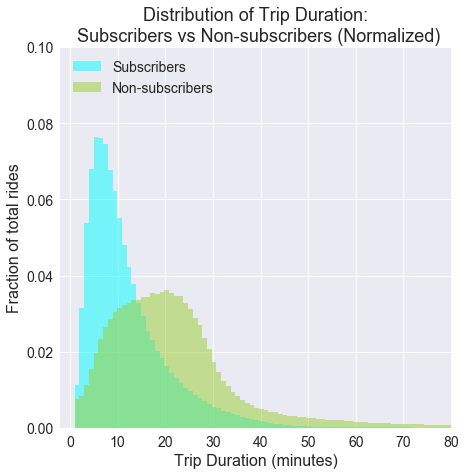

In [67]:
# This time normalized
plt.figure(figsize=(7, 7))
plt.hist(daily_subs_dur, bins=120, normed=True, color='aqua', alpha=0.5, label='Subscribers')
plt.hist(daily_nonsubs_dur, bins=120, normed=True, color='yellowgreen', alpha=0.5, label='Non-subscribers')
plt.title('Distribution of Trip Duration:\n Subscribers vs Non-subscribers (Normalized)', fontsize=18)
plt.xlabel('Trip Duration (minutes)', fontsize=16)
plt.ylabel('Fraction of total rides', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=16)
plt.xlim([-2, 80])
plt.ylim([0, 0.1])
plt.legend(loc='upper left', fontsize=14)

In [42]:
# Normality Test & Test for significant difference
subs_normaltest_ressult = scs.normaltest(daily_subs_dur)
nonsubs_normaltest_ressult = scs.normaltest(daily_nonsubs_dur)

type_MWtest_result = scs.mannwhitneyu(daily_subs_dur, daily_nonsubs_dur)
type_Ttest_result = scs.ttest_ind(daily_subs_dur, daily_nonsubs_dur)

print('----- Test for normality and test for differences between subs and non-subs -----')
print('Is subscriber trip duration normally distributed?: %s (p-value=%f)'\
      % (normal_or_not(subs_normaltest_ressult), subs_normaltest_ressult.pvalue))
print('Is non-subscriber trip duration normally distributed?: %s (p-value=%f)'\
      % (normal_or_not(nonsubs_normaltest_ressult), nonsubs_normaltest_ressult.pvalue))

print('----- Are subscriber and non-subscriber trip duration patterns different? -----')
print('Mann-Whitney U test: %s (p-value=%f)'\
                  % (significantly_different_or_not(type_MWtest_result), type_MWtest_result.pvalue))
print('T test: %s (p-value=%f)'\
                  % (significantly_different_or_not(type_Ttest_result), type_Ttest_result.pvalue))

----- Test for normality and test for differences between subs and non-subs -----
Is subscriber trip duration normally distributed?: No (p-value=0.000000)
Is non-subscriber trip duration normally distributed?: No (p-value=0.000000)
----- Are subscriber and non-subscriber trip duration patterns different? -----
Mann-Whitney U test: Yes (p-value=0.000000)
T test: Yes (p-value=0.000000)


In [43]:
# Usage by the day of the week
subs_dayofweek = daily_subs.groupby(['start_year', 'start_month', 'start_day', 'start_dayofweek', 'usertype'])\
                                                    .size().unstack('start_dayofweek')
nonsubs_dayofweek = daily_nonsubs.groupby(['start_year', 'start_month', 'start_day', 'start_dayofweek', 'usertype'])\
                                                                 .size().unstack('start_dayofweek')
    
subs_dayofweek.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
nonsubs_dayofweek.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [44]:
subs_dayofweek.describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99]).astype(int)

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
count,195,194,195,194,196,194,194
mean,26501,28438,29731,28911,26914,18914,18325
std,11563,12942,13292,13019,12189,8554,7791
min,1449,1185,2423,873,1123,1096,1768
25%,17644,18390,20918,19961,17471,12371,12855
50%,27696,29608,31463,29525,28864,20229,19142
75%,32309,35137,36726,36654,33759,24139,22935
95%,46103,51483,51879,50009,46543,32129,30969
99%,54426,59174,59729,61139,57699,39489,39699
max,56001,61217,62131,61518,58278,44147,40586


In [45]:
nonsubs_dayofweek.describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99]).astype(int)

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
count,90,86,92,91,91,91,89
mean,1617,1447,1325,1359,1664,3552,3283
std,1792,1507,1500,1677,1855,3674,3426
min,1,1,1,1,1,1,1
25%,105,95,49,107,97,89,174
50%,600,592,475,557,782,2146,1441
75%,2983,2780,2593,2422,3390,6601,6354
95%,4509,4050,4138,3672,4892,9736,9436
99%,6346,5135,4951,5499,6008,13557,11361
max,8287,5367,4964,10773,8175,13648,12243


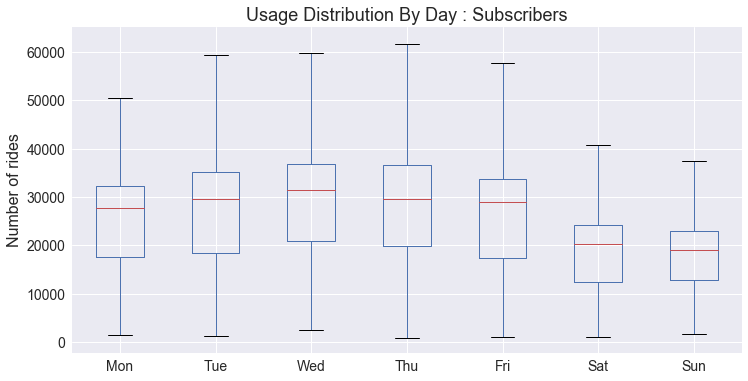

In [46]:
# Plot the weekly usage distribution for subscribers
ax9 = subs_dayofweek.plot(kind='box',  figsize=(12, 6))
ax9.set_title('Usage Distribution By Day : Subscribers', fontsize=18)
ax9.set_ylabel('Number of rides', fontsize=16)
for tick in ax9.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax9.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

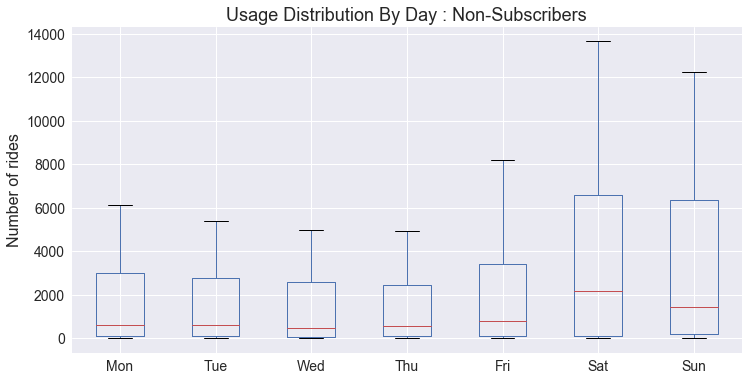

In [47]:
# Plot the weekly usage distribution for non-subscribers
ax10 = nonsubs_dayofweek.plot(kind='box',  figsize=(12, 6))
ax10.set_title('Usage Distribution By Day : Non-Subscribers', fontsize=18)
ax10.set_ylabel('Number of rides', fontsize=16)
for tick in ax10.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax10.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

In [48]:
# Test for different between days for each user type
subs_dayofweek_usage = subs_dayofweek.reset_index()[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]
nonsubs_dayofweek_usage = nonsubs_dayofweek.reset_index()[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

In [49]:
# Prepare data for pair-wise statistical test
sdayofweek_usage = []
nsdayofweek_usage = []

# Create lists containing weekly usage data by iterating over days of the week
# Each element in a row is a vector containing usage data for each day of the week
for i in range(7):
    s_usage = np.array(subs_dayofweek_usage.iloc[:, i].dropna()).reshape(-1,1)
    ns_usage = np.array(nonsubs_dayofweek_usage.iloc[:, i].dropna()).reshape(-1,1)
    
    sdayofweek_usage.append(s_usage)
    nsdayofweek_usage.append(ns_usage)

In [50]:
# Create tables to store pair-wise statistical test results
daysofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']

subs_MWtest_table_pvalues = pd.DataFrame(columns=daysofweek)
subs_MWtest_table_pvalues['days'] = daysofweek
subs_MWtest_table_pvalues = subs_MWtest_table_pvalues[['days', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']]
subs_MWtest_table_significance =subs_MWtest_table_pvalues.copy()

nonsubs_MWtest_table_pvalues = subs_MWtest_table_pvalues.copy()
nonsubs_MWtest_table_significance = subs_MWtest_table_pvalues.copy()

In [51]:
# Conduct pair-wise Mann-Whitney U test to assesse ridership difference between days of the week
for i in range(7):
    for j in range(7):
        subs_result = scs.mannwhitneyu(sdayofweek_usage[i], sdayofweek_usage[j])
        subs_MWtest_table_pvalues.iloc[i, j+1] = subs_result.pvalue.round(4)
        if subs_result.pvalue < 0.01:
            subs_MWtest_table_significance.iloc[i, j+1] = '*'
        else:
            subs_MWtest_table_significance.iloc[i, j+1] = ''
        
        nonsubs_result = scs.mannwhitneyu(nsdayofweek_usage[i], nsdayofweek_usage[j])
        nonsubs_MWtest_table_pvalues.iloc[i, j+1] = nonsubs_result.pvalue.round(4)
        if nonsubs_result.pvalue < 0.01:
            nonsubs_MWtest_table_significance.iloc[i, j+1] = '*'
        else:
            nonsubs_MWtest_table_significance.iloc[i, j+1] = ''
        

In [52]:
# P-values for subscribers
subs_MWtest_table_pvalues.set_index('days')

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
days,,,,,,,
Monday,0.4998,0.0594,0.0022,0.0302,0.2687,0,0
Tuesday,0.0594,0.4998,0.1026,0.3382,0.1556,0,0
Wednesday,0.0022,0.1026,0.4998,0.2048,0.0106,0,0
Thursday,0.0302,0.3382,0.2048,0.4998,0.074,0,0
Friday,0.2687,0.1556,0.0106,0.074,0.4998,0,0
Saturday,0,0,0,0,0,0.4998,0.1737
Sunday,0,0,0,0,0,0.1737,0.4998


In [53]:
# subscribers: Significance indicated as *
subs_MWtest_table_significance.set_index('days')

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
days,,,,,,,
Monday,,,*,,,*,*
Tuesday,,,,,,*,*
Wednesday,*,,,,,*,*
Thursday,,,,,,*,*
Friday,,,,,,*,*
Saturday,*,*,*,*,*,,
Sunday,*,*,*,*,*,,


In [54]:
# P-values for non-subscribers
nonsubs_MWtest_table_pvalues.set_index('days')

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
days,,,,,,,
Monday,0.4994,0.3724,0.1575,0.1872,0.37,0.0016,0.0024
Tuesday,0.3724,0.4994,0.2272,0.2597,0.3073,0.0009,0.0017
Wednesday,0.1575,0.2272,0.4994,0.4716,0.133,0.0001,0.0002
Thursday,0.1872,0.2597,0.4716,0.4994,0.1499,0.0003,0.0005
Friday,0.37,0.3073,0.133,0.1499,0.4994,0.0019,0.0026
Saturday,0.0016,0.0009,0.0001,0.0003,0.0019,0.4994,0.3781
Sunday,0.0024,0.0017,0.0002,0.0005,0.0026,0.3781,0.4994


In [55]:
# non-subscribers: Significance indicated as *
nonsubs_MWtest_table_significance.set_index('days')

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
days,,,,,,,
Monday,,,,,,*,*
Tuesday,,,,,,*,*
Wednesday,,,,,,*,*
Thursday,,,,,,*,*
Friday,,,,,,*,*
Saturday,*,*,*,*,*,,
Sunday,*,*,*,*,*,,


<b>Hourly Usage pattern: subscribers vs non-subscribers</b>

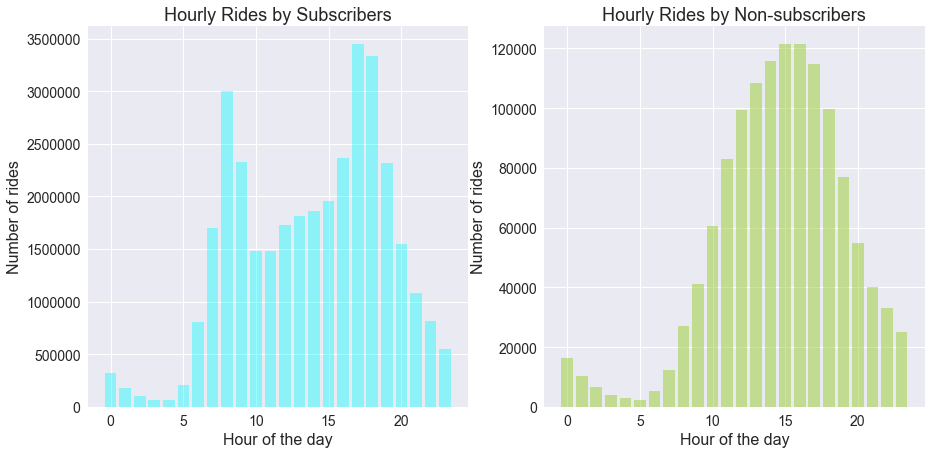

In [56]:
# Group the subscriber and non-subscriber date by the hour of the day of the ride
# Plot frequency distribution for each set
usage_by_hour_usertype = data.groupby(['start_hour','usertype']).size().unstack('usertype')
fig, (ax11, ax12) = plt.subplots(1, 2, figsize=(15, 7), sharey=False, sharex=True)
ax11.bar(usage_by_hour_usertype.index, usage_by_hour_usertype['Subscriber'], color='aqua', alpha=0.4)
ax11.set_title('Hourly Rides by Subscribers', fontsize=18)
ax11.set_xlabel('Hour of the day', fontsize=16)
ax11.set_ylabel('Number of rides', fontsize=16)
for tick in ax11.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax11.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    
ax12.bar(usage_by_hour_usertype.index, usage_by_hour_usertype['Customer'], color='yellowgreen', alpha=0.5)
ax12.set_title('Hourly Rides by Non-subscribers', fontsize=18)
ax12.set_xlabel('Hour of the day', fontsize=16)
ax12.set_ylabel('Number of rides', fontsize=16)
for tick in ax12.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax12.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

In [57]:
# Prepare datasets for plotting differently
hourly_subs = data[data.usertype == 'Subscriber']['start_hour']
hourly_nonsubs = data[data.usertype == 'Customer']['start_hour']

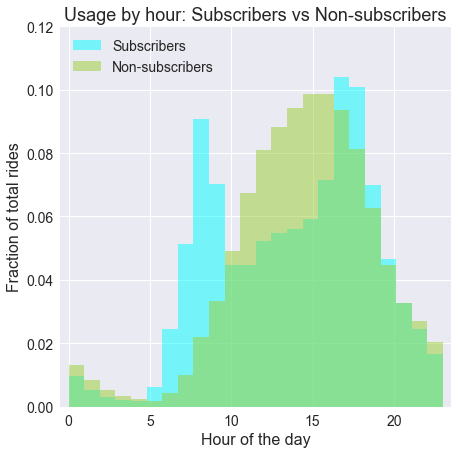

In [58]:
# This time normalized frequency distribution plotted
plt.figure(figsize=(7, 7))
plt.hist(hourly_subs, bins=24, normed=True, color='aqua', alpha=0.5, label='Subscribers')
plt.hist(hourly_nonsubs, bins=24, normed=True, color='yellowgreen', alpha=0.5, label='Non-subscribers')
plt.title('Usage by hour: Subscribers vs Non-subscribers', fontsize=18)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Fraction of total rides', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=16)
plt.xlim([-0.5, 23.5])
plt.ylim([0, 0.12])
plt.legend(loc='upper left', fontsize=14)

In [59]:
# Normality Test & Test for significant difference
hourly_subs_normaltest_ressult = scs.normaltest(hourly_subs)
hourly_nonsubs_normaltest_ressult = scs.normaltest(hourly_nonsubs)

hourly_type_MWtest_result = scs.mannwhitneyu(hourly_subs, hourly_nonsubs)
hourly_type_Ttest_result = scs.ttest_ind(hourly_subs, hourly_nonsubs)

print('----- Test for normality and test for differences between subs and non-subs -----')
print('Is subscriber trip duration normally distributed?: %s (p-value=%f)'\
      % (normal_or_not(hourly_subs_normaltest_ressult), hourly_subs_normaltest_ressult.pvalue))
print('Is non-subscriber trip duration normally distributed?: %s (p-value=%f)'\
      % (normal_or_not(hourly_nonsubs_normaltest_ressult), hourly_nonsubs_normaltest_ressult.pvalue))

print('----- Are subscriber and non-subscriber trip duration patterns different? -----')
print('Mann-Whitney U test: %s (p-value=%f)'\
                  % (significantly_different_or_not(hourly_type_MWtest_result), hourly_type_MWtest_result.pvalue))
print('T test: %s (p-value=%f)'\
                  % (significantly_different_or_not(hourly_type_Ttest_result), hourly_type_Ttest_result.pvalue))

----- Test for normality and test for differences between subs and non-subs -----
Is subscriber trip duration normally distributed?: No (p-value=0.000000)
Is non-subscriber trip duration normally distributed?: No (p-value=0.000000)
----- Are subscriber and non-subscriber trip duration patterns different? -----
Mann-Whitney U test: Yes (p-value=0.000000)
T test: Yes (p-value=0.000000)


In [60]:
hourly_subs.describe().astype(int)

count    34591106
mean           13
std             4
min             0
25%             9
50%            15
75%            18
max            23
Name: start_hour, dtype: int64

In [61]:
hourly_nonsubs.describe().astype(int)

count    1282787
mean          14
std            4
min            0
25%           12
50%           15
75%           18
max           23
Name: start_hour, dtype: int64